In [49]:
%load_ext autoreload
%autoreload 2
%reset -f


import psyplot.project as psy
import psyplot
from psy_maps.plotters import FieldPlotter
import netCDF4
import glob
import xarray as xr
import matplotlib as mpl
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from stats import *
import sys
from scipy.signal import savgol_filter

%matplotlib inline
%config InlineBackend.close_figures = False


print("import ok")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
import ok


In [50]:
reso = "low"

grid_b = '../data/nc_data/grid_with_boundaries_'+reso + 'res.nc'
f_input_save =  '/gpfsscratch/rech/psl/upu87pm/preprocessed_data/scoring_input.npy'
f_target_save = ['../data/npy_data/prediction/target_'+str(i)+'.npy' for i in range(73)]
f_save = ['../data/npy_data/prediction/prediction_'+str(i)+'.npy' for i in range(73)]
unscale = '../../ClimSim/preprocessing/normalizations/outputs/output_scale.nc'

print(grid_b)

var = 'cam_out_PRECC'

../data/nc_data/grid_with_boundaries_lowres.nc


One day of data

In [51]:
Out = npy_toxarray(f_target_save[:2], grid_b,  var = 'cam_out_SOLS')

(46080, 128)
time counter =  120


Exception ignored in atexit callback: <bound method InteractiveShell.atexit_operations of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f9780219150>>
Traceback (most recent call last):
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3765, in atexit_operations
    self._atexit_once()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3748, in _atexit_once
    self.history_manager.end_session()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/history.py", line 602, in end_session
    self.writeout_cache()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File "/gpfslocalsup/pub/anaconda-py3/

In [47]:
#pred = npy_toxarray(f_save, grid_b, unscale = unscale)
pred = npy_toxarray(f_save[:2], grid_b,   var = 'cam_out_SOLS')

(46080, 128)
time counter =  120


In [35]:
Out

<xarray.Dataset>
Dimensions:       (ncol: 384, ilev: 61, lev: 60, nvertex: 10, time_counter: 120)
Coordinates:
  * ncol          (ncol) int64 0 1 2 3 4 5 6 7 ... 377 378 379 380 381 382 383
    lat           (ncol) float64 -32.59 -35.99 -22.69 ... 45.34 45.34 40.39
    lon           (ncol) float64 320.3 331.5 320.4 331.7 ... 123.3 146.7 135.0
  * lev           (lev) float64 0.0 1.0 2.0 3.0 4.0 ... 55.0 56.0 57.0 58.0 59.0
  * ilev          (ilev) float64 0.0 1.0 2.0 3.0 4.0 ... 57.0 58.0 59.0 60.0
    bounds_lat    (ncol, nvertex) float64 -27.62 -30.57 -38.86 ... 46.52 46.52
    bounds_lon    (ncol, nvertex) float64 -35.02 -32.58 -36.32 ... 137.6 137.6
  * time_counter  (time_counter) int64 0 1 2 3 4 5 6 ... 114 115 116 117 118 119
Dimensions without coordinates: nvertex
Data variables:
    P0            float64 ...
    Ps            float64 ...
    PI            (ilev, ncol) float64 ...
    area          (ncol) float64 0.02745 0.0307 0.0307 ... 0.0307 0.0307 0.02745
    hyai          (ilev) float64 ...
    hyam          (lev) float64 ...
    hybi          (ilev) float64 ...
    hybm          (lev) float64 ...
    cam_out_SOLS  (time_counter, ncol) float64 0.0 0.0 0.0 ... 0.06952 5.423e-29
Attributes:
    description:  test_climsim

In [36]:
grid = xr.open_dataset(grid_b)

In [37]:
psy.rcParams['plotter.maps.xgrid'] = False
psy.rcParams['plotter.maps.ygrid'] = False
mpl.rcParams['figure.figsize'] = [8., 6.]

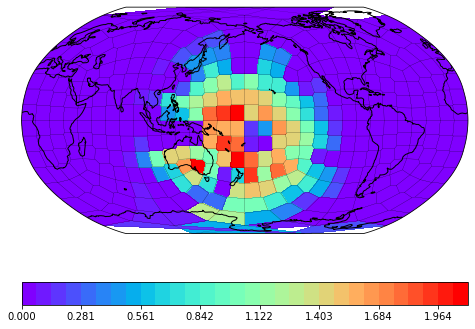

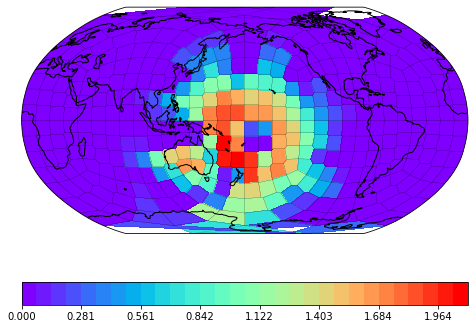

In [39]:
var = 'cam_out_SOLS'
nc = 31
lev = 49
time_counter = 36

inf = min(Out[var][time_counter].min(), pred[var][time_counter].min())
sup = max(Out[var][time_counter].max(), pred[var][time_counter].max())



map_out = Out.psy.plot.mapplot(name=var, time_counter = time_counter, cmap = 'rainbow', datagrid={'c': 'k', 'lw': 0.1}, projection='robin', bounds = np.linspace(inf,sup,nc))
map_pred = pred.psy.plot.mapplot(name=var, time_counter = time_counter, cmap = 'rainbow', datagrid={'c': 'k', 'lw': 0.1}, projection='robin', bounds = np.linspace(inf, sup, nc))

In [ ]:
var = 'ptend_t'
lev = 9
nc = 31
time_counter = 2689

inf = min(Out[var][time_counter][lev].min(), pred[var][time_counter][lev].min())
sup = max(Out[var][time_counter][lev].max(), pred[var][time_counter][lev].max())
L = max(abs(inf), abs(sup))

map_out = Out.psy.plot.mapplot(name=var, lev = lev, time_counter = time_counter, cmap = 'bwr', datagrid={'c': 'k', 'lw': 0.1}, projection='robin', bounds = np.linspace(-L, L, nc))
map_pred = pred.psy.plot.mapplot(name=var, lev = lev, time_counter = time_counter, cmap = 'bwr', datagrid={'c': 'k', 'lw': 0.1}, projection='robin', bounds = np.linspace(-L,L,nc))

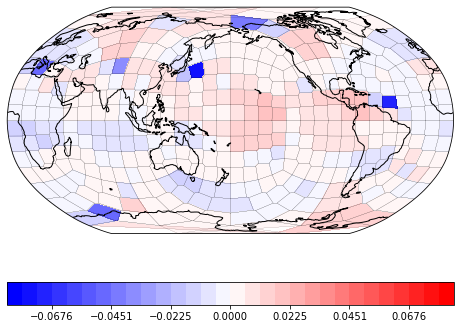

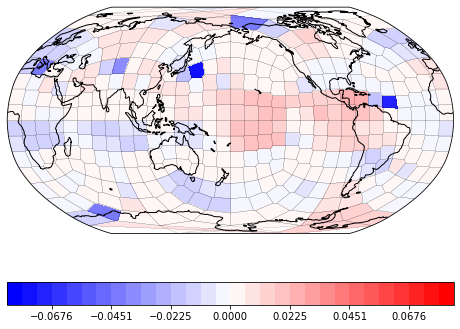

In [8]:
mean_out = Out.mean('time_counter', keep_attrs = True)
mean_pred = pred.mean('time_counter', keep_attrs = True)

var = 'ptend_t'
lev = 59

inf = min(mean_out[var][:][lev].min(), mean_pred[var][:][lev].min())
sup = max(mean_out[var][:][lev].max(), mean_pred[var][:][lev].max())

L = max(abs(inf), abs(sup))

map_out = mean_out.psy.plot.mapplot(name=var, cmap = 'bwr', datagrid={'c': 'k', 'lw': 0.1}, projection='robin', bounds = np.linspace(-L, L,nc))
map_pred = mean_pred.psy.plot.mapplot(name=var, cmap = 'bwr', datagrid={'c': 'k', 'lw': 0.1}, projection='robin', bounds = np.linspace(-L, L,nc))

In [9]:
dp = compute_dp(grid)
dp.sum(axis=0)

array([100785.77126795, 101502.04470545,  99106.56033045, 100879.61501795,
       101502.98220545, 101472.59158045, 101329.41189295, 101543.65408045,
       101175.11501795,  99855.75564295, 100266.47439295,  95882.02908045,
        98856.09158045, 100153.08376795,  94380.59158045,  98132.48220545,
        98468.68533045, 100432.33376795,  99554.45876795, 100758.38064295,
       101191.51345545, 101321.20095545, 101096.31033045, 100901.41970545,
        99234.16189295,  93341.16189295,  99323.43533045,  94725.02908045,
        92009.41189295,  96484.06814295,  92234.34158045,  95023.86501795,
       100838.02908045, 101129.19314295, 101582.30251795, 101536.70095545,
       100639.13845545,  99504.52908045, 100420.56814295,  98346.75564295,
        98150.02126795,  95507.22439295,  96949.20876795,  96120.76345545,
        93181.62283045,  93715.09939295,  94755.56814295,  93787.24783045,
       102173.73220545, 102072.59939295, 102291.15408045, 102112.97439295,
       100708.05251795,  

In [17]:
grid['Ps']

<xarray.DataArray 'Ps' ()>
array(9.96921e+36)

In [8]:
convert(pred, dp)
convert(Out, dp)

In [21]:
Out

<xarray.Dataset>
Dimensions:       (ncol: 384, ilev: 61, lev: 60, nvertex: 10, time_counter: 4380)
Coordinates:
  * ncol          (ncol) int64 0 1 2 3 4 5 6 7 ... 377 378 379 380 381 382 383
    lat           (ncol) float64 -32.59 -35.99 -22.69 ... 45.34 45.34 40.39
    lon           (ncol) float64 320.3 331.5 320.4 331.7 ... 123.3 146.7 135.0
  * lev           (lev) float64 0.0 1.0 2.0 3.0 4.0 ... 55.0 56.0 57.0 58.0 59.0
  * ilev          (ilev) float64 0.0 1.0 2.0 3.0 4.0 ... 57.0 58.0 59.0 60.0
    bounds_lat    (ncol, nvertex) float64 -27.62 -30.57 -38.86 ... 46.52 46.52
    bounds_lon    (ncol, nvertex) float64 -35.02 -32.58 -36.32 ... 137.6 137.6
  * time_counter  (time_counter) int64 0 1 2 3 4 5 ... 4375 4376 4377 4378 4379
Dimensions without coordinates: nvertex
Data variables:
    P0            float64 9.969e+36
    Ps            float64 9.969e+36
    PI            (ilev, ncol) float64 5.588 5.588 5.588 ... 1.006e+05 9.984e+04
    area          (ncol) float64 0.02745 0.0307 0.0307 ... 0.0307 0.0307 0.02745
    hyai          (ilev) float64 5.588e-05 0.0001008 0.0001814 ... 0.003284 0.0
    hyam          (lev) float64 7.835e-05 0.0001411 ... 0.004902 0.001642
    hybi          (ilev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9467 0.9642 0.982 1.0
    hybm          (lev) float64 0.0 0.0 0.0 0.0 ... 0.9381 0.9555 0.9731 0.991
    ptend_t       (time_counter, lev, ncol) float64 -1.36e-05 ... -4.124e-05
    ptend_t_c     (time_counter, lev, ncol) float64 -0.0001718 ... -0.1705
Attributes:
    description:  test_climsim

In [13]:
mae1 = (np.abs(Out['ptend_t'][:1500]  - pred['ptend_t'][:1500])).mean('time_counter')
mae1 = mae1.mean('ncol') # simple mean
np.array(mae1)

array([0.01380713, 0.01215569, 0.02678496, 0.01134551, 0.02280089,
       0.00781524, 0.01529412, 0.01447033, 0.00788502, 0.01112751,
       0.01388304, 0.01190776, 0.01889545, 0.02006246, 0.01941303,
       0.01181901, 0.02151543, 0.02159266, 0.01782027, 0.01757274,
       0.01324595, 0.01385077, 0.02198147, 0.02656594, 0.02906224,
       0.02580402, 0.0183106 , 0.01460788, 0.01268314, 0.01236284,
       0.01423726, 0.00983807, 0.01710208, 0.00852896, 0.0203782 ,
       0.01574327, 0.01973651, 0.00963826, 0.01548345, 0.01613846,
       0.01087483, 0.01052858, 0.01109576, 0.0051673 , 0.00738055,
       0.00754225, 0.00448419, 0.00876888, 0.00712598, 0.01025011,
       0.01176011, 0.0141403 , 0.01221567, 0.00539266, 0.00819318,
       0.00740328, 0.00472656, 0.01066877, 0.00720472, 0.01081826],
      dtype=float32)

In [14]:
mae2 = (np.abs(Out['ptend_t'][1500:]  - pred['ptend_t'][1500:])).mean('time_counter')
mae2 = mae2.mean('ncol') # simple mean
np.array(mae2)

array([0.01229709, 0.00990362, 0.01773087, 0.00805894, 0.0164594 ,
       0.01383626, 0.01855598, 0.01391944, 0.00759585, 0.00957726,
       0.01172024, 0.01076223, 0.01572859, 0.01863081, 0.01314771,
       0.01258276, 0.023232  , 0.01981564, 0.01568651, 0.01920602,
       0.01280622, 0.01234348, 0.01802524, 0.02428511, 0.0233306 ,
       0.02759797, 0.0225144 , 0.01765775, 0.01685564, 0.01357997,
       0.01152377, 0.00912962, 0.01576385, 0.00699192, 0.01834991,
       0.0140186 , 0.0269009 , 0.01405778, 0.0168279 , 0.02085267,
       0.01017817, 0.01029922, 0.01245999, 0.00518544, 0.00917989,
       0.00796205, 0.00480329, 0.00939068, 0.00659872, 0.00965905,
       0.01166668, 0.01398938, 0.01269004, 0.00641068, 0.01041415,
       0.00875893, 0.00645776, 0.01129322, 0.00818371, 0.01238066],
      dtype=float32)

In [14]:
r2 = 1 - ((Out['ptend_t'] - pred['ptend_t']                    )**2.).sum('time_counter')/\
                    ((Out['ptend_t'] - Out['ptend_t'].mean('time_counter'))**2.).sum('time_counter')

r2 = r2.mean('ncol') # simple mean


In [31]:
pred

<xarray.Dataset>
Dimensions:       (ncol: 384, ilev: 61, lev: 60, nvertex: 10, time_counter: 4380)
Coordinates:
  * ncol          (ncol) int64 0 1 2 3 4 5 6 7 ... 377 378 379 380 381 382 383
    lat           (ncol) float64 -32.59 -35.99 -22.69 ... 45.34 45.34 40.39
    lon           (ncol) float64 320.3 331.5 320.4 331.7 ... 123.3 146.7 135.0
  * lev           (lev) float64 0.0 1.0 2.0 3.0 4.0 ... 55.0 56.0 57.0 58.0 59.0
  * ilev          (ilev) float64 0.0 1.0 2.0 3.0 4.0 ... 57.0 58.0 59.0 60.0
    bounds_lat    (ncol, nvertex) float64 -27.62 -30.57 -38.86 ... 46.52 46.52
    bounds_lon    (ncol, nvertex) float64 -35.02 -32.58 -36.32 ... 137.6 137.6
  * time_counter  (time_counter) int64 0 1 2 3 4 5 ... 4375 4376 4377 4378 4379
Dimensions without coordinates: nvertex
Data variables:
    P0            float64 ...
    Ps            float64 ...
    PI            (ilev, ncol) float64 ...
    area          (ncol) float64 0.02745 0.0307 0.0307 ... 0.0307 0.0307 0.02745
    hyai          (ilev) float64 ...
    hyam          (lev) float64 ...
    hybi          (ilev) float64 ...
    hybm          (lev) float64 ...
    ptend_t       (time_counter, lev, ncol) float64 -1.813e-05 ... -3.585e-05
    ptend_t_c     (time_counter, lev, ncol) float64 -0.0002291 ... -0.1482
Attributes:
    description:  test_climsim

Text(0.5, 1.0, 'True dt')

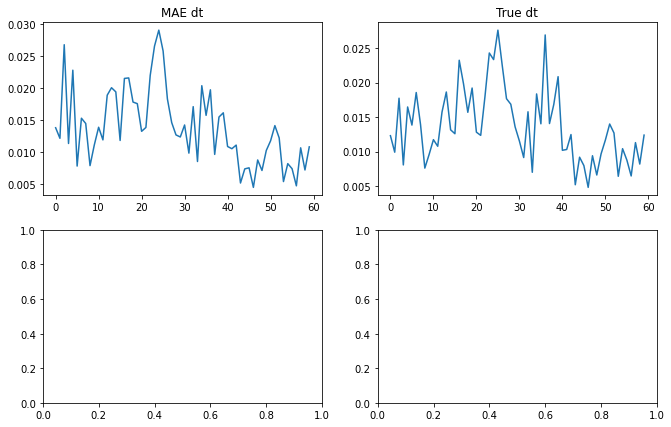

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(11, 7))
#mae_ = savgol_filter(mae, 51, 16) # window size 51, polynomial order 3
axs[0,0].plot(range(60), mae1)
axs[0,0].set_title("MAE dt")
axs[0,1].plot(range(60), mae2)
axs[0,1].set_title("True dt")

#axs[1,0].plot(range(60), rmse)
#axs[1,0].set_title("RMSE dt")
#axs[0,1].plot(range(60), r2)
#axs[0,1].set_title("R2 dt")